In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config
from src.data_processing import DataDict, ItemDict
import json
pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


from IPython.display import display

In [2]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

In [3]:
dir_data = data_dirs["DADOS"]
dir_parquet_data = dir_data["MICRODADOS_ENEM_2023_parquet"]
path_parquet_file = dir_data["MICRODADOS_ENEM_2023.parquet"]
path_parquet_itens = dir_data["ITENS_PROVA_2023.parquet"]

In [4]:
list_parquet = list(dir_parquet_data.list_file().values())

## **Dicionário das variáveis**

In [5]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

## **Carregar dados**

### **Carregar Microdado enem**

In [6]:
df = pd.read_parquet(path_parquet_file)

In [7]:
df1 = pd.read_parquet(list_parquet[0])
df2 = pd.read_parquet(list_parquet[0])
df = pd.concat([df1,df2])

### **Carregar Itens**

In [7]:
df_items = pd.read_parquet(path_parquet_itens)

# **Perguntas**

### **"Qual o perfil socioeconômico dos candidatos de maior nota na prova de matemática"**

### **Definir grupo**

In [117]:
# Definir grupo de maior nota usando cerca de tukey
variable = list(filter(lambda x: ("Q" in x or x == "NU_NOTA_MT") and len(x) < 11 ,dict_microdados.tabel["Nome da variavel"].values))
print(variable)

['NU_NOTA_MT', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']


In [9]:
df_group = df[variable]
df_group = df_group.dropna(subset=variable)
df_group = df_group[df_group[variable[0]] > 0]
# notas de matemática
notas_matematica = df_group["NU_NOTA_MT"]

In [10]:
Q1 = notas_matematica.quantile(0.25)
Q3 = notas_matematica.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


In [11]:
df_group = df_group[df_group["NU_NOTA_MT"] > limite_superior]

## **Analisar distribuição dos candidatos entre os atributos socioeconômicos**

In [12]:
grupo = df_group.groupby('Q001')["NU_NOTA_MT"].count()

In [25]:
print(grupo)

Q001
A      3
B     38
C     44
D     61
E    417
F    567
G    772
H     43
Name: NU_NOTA_MT, dtype: int64


In [33]:
dict_microdados.tabel[dict_microdados.tabel["Nome da variavel"] == 'Q001']["Descricao"].values[0]

'Até que série seu pai, ou o homem responsável por você, estudou?'

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

def getPizza(df: pd.DataFrame, attr: str):
    group = df.groupby(attr)["NU_NOTA_MT"].count()
    total = group.sum()
    porcentagens = 100 * group / total

    # Monta rótulos apenas para categorias com >= 4%
    labels = [label if pct >= 2.3 else '' for label, pct in zip(group.index, porcentagens)]

    # Título descritivo
    descricao = dict_microdados.tabel[dict_microdados.tabel["Nome da variavel"] == attr]["Descricao"].values[0]

    # Plot manual com plt.pie para ter mais controle
    plt.figure(figsize=(15, 8))
    plt.pie(
        group,
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 2.3 else '',
        startangle=90
    )

    plt.title(f'Distribuição: {attr}', y=1.08)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # Exibe a legenda completa separadamente, se desejar
    display(dict_microdados.legenda[attr])


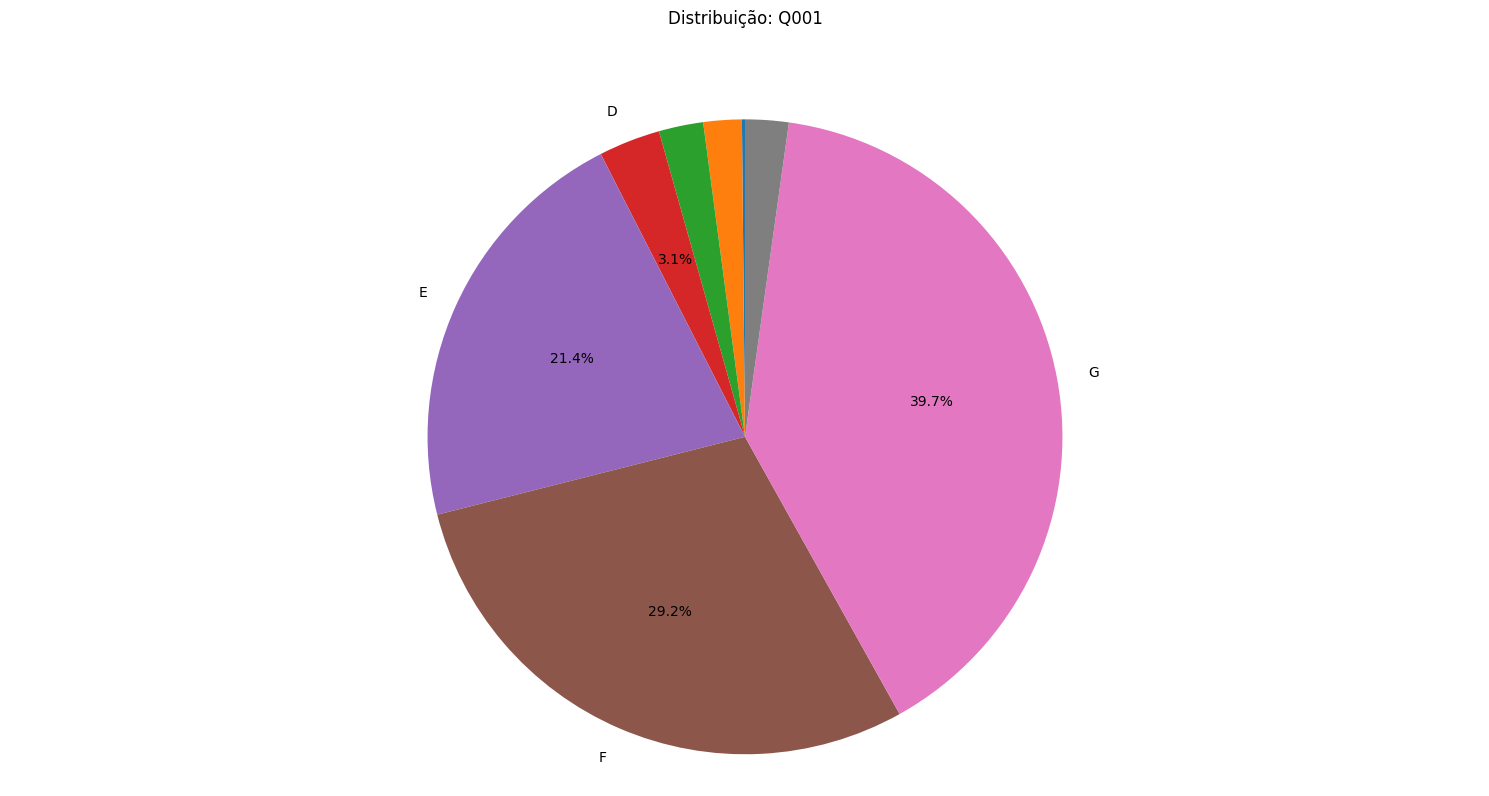

,categoria,descricao
0,A,Nunca estudou.
1,B,Não completou a 4ª série/5º ano do Ensino Fundamental.
2,C,"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental."
3,D,"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio."
4,E,"Completou o Ensino Médio, mas não completou a Faculdade."
5,F,"Completou a Faculdade, mas não completou a Pós-graduação."
6,G,Completou a Pós-graduação.
7,H,Não sei.


In [80]:
getPizza(df_group, variable[1])

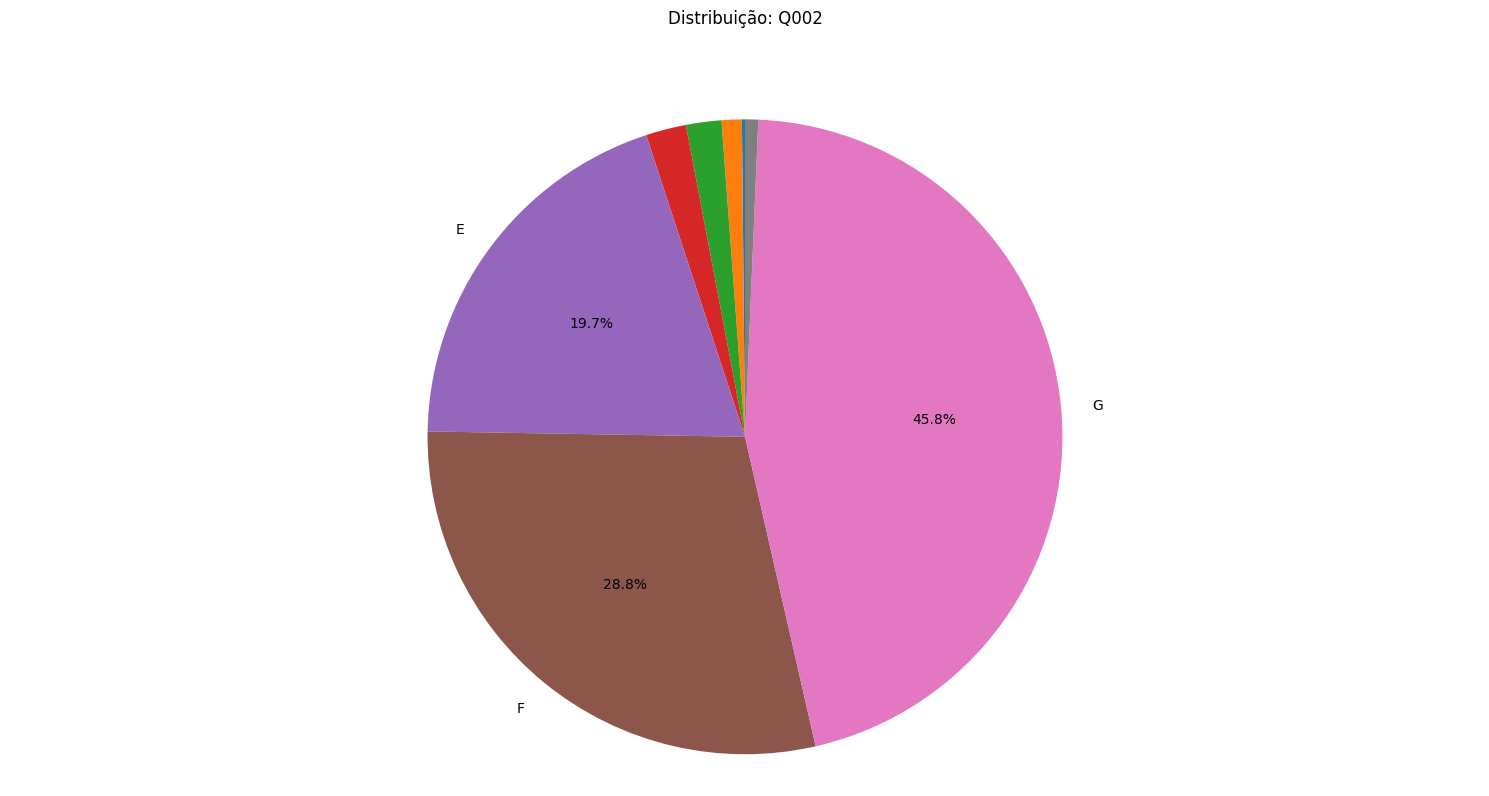

,categoria,descricao
0,A,Nunca estudou.
1,B,Não completou a 4ª série/5º ano do Ensino Fundamental.
2,C,"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental."
3,D,"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio."
4,E,"Completou o Ensino Médio, mas não completou a Faculdade."
5,F,"Completou a Faculdade, mas não completou a Pós-graduação."
6,G,Completou a Pós-graduação.
7,H,Não sei.


In [81]:
getPizza(df_group, variable[2])

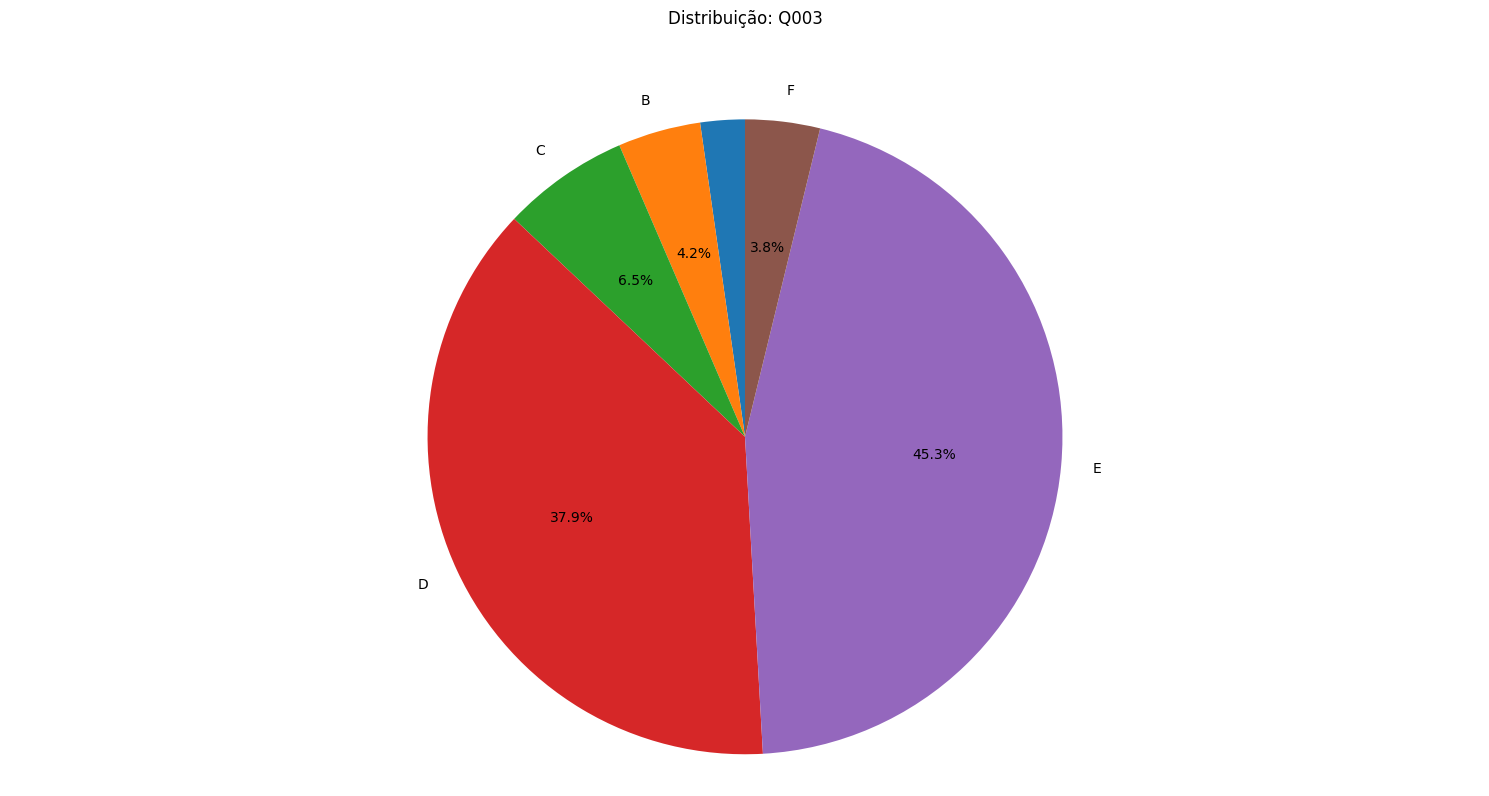

,categoria,descricao
0,A,"Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista."
1,B,"Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria."
2,C,"Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista."
3,D,"Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria."
4,E,"Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados."
5,F,Não sei.


In [82]:
getPizza(df_group, variable[3])

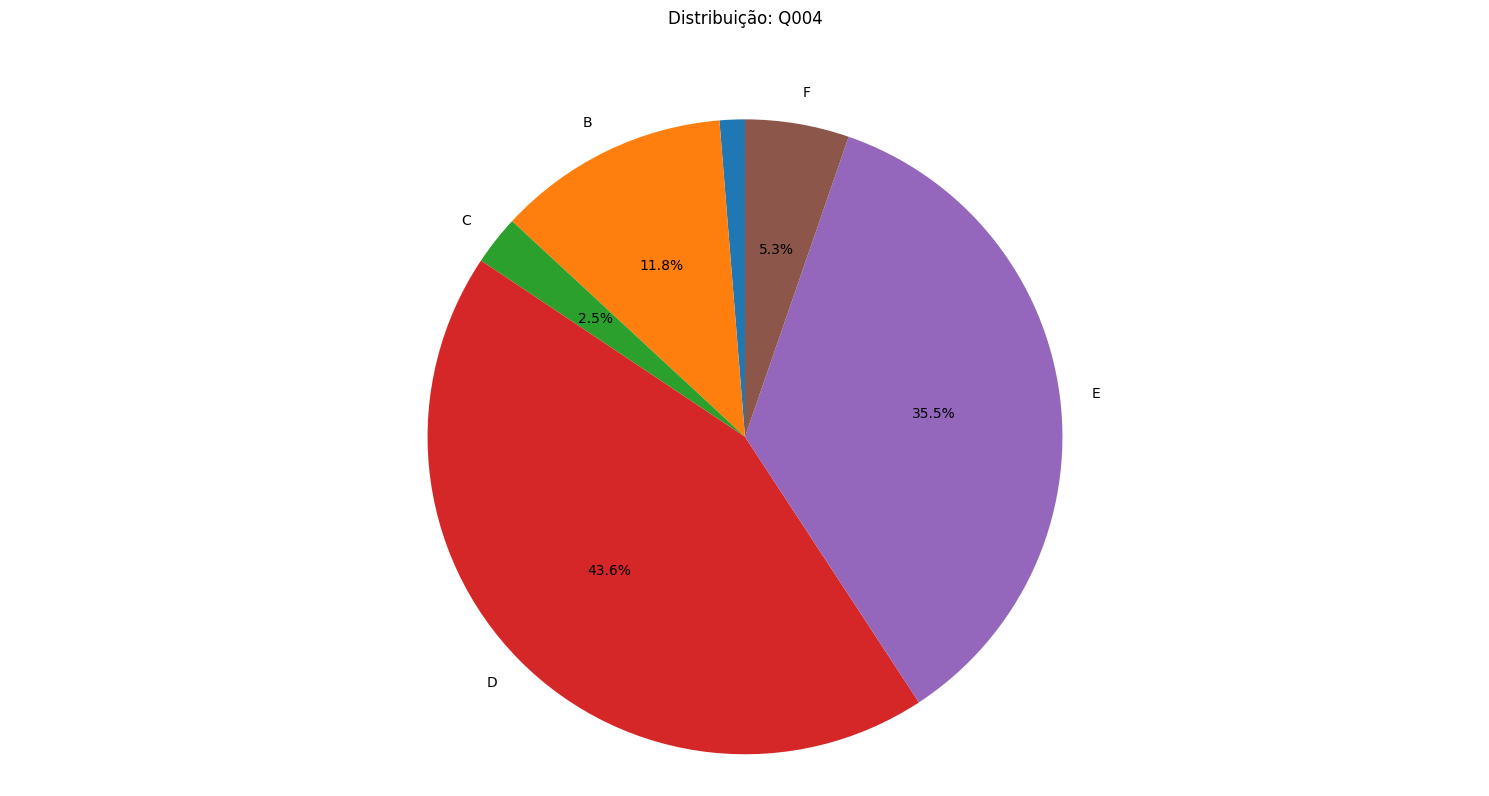

,categoria,descricao
0,A,"Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista."
1,B,"Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria."
2,C,"Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista."
3,D,"Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria."
4,E,"Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados."
5,F,Não sei.


In [83]:
getPizza(df_group, variable[4])

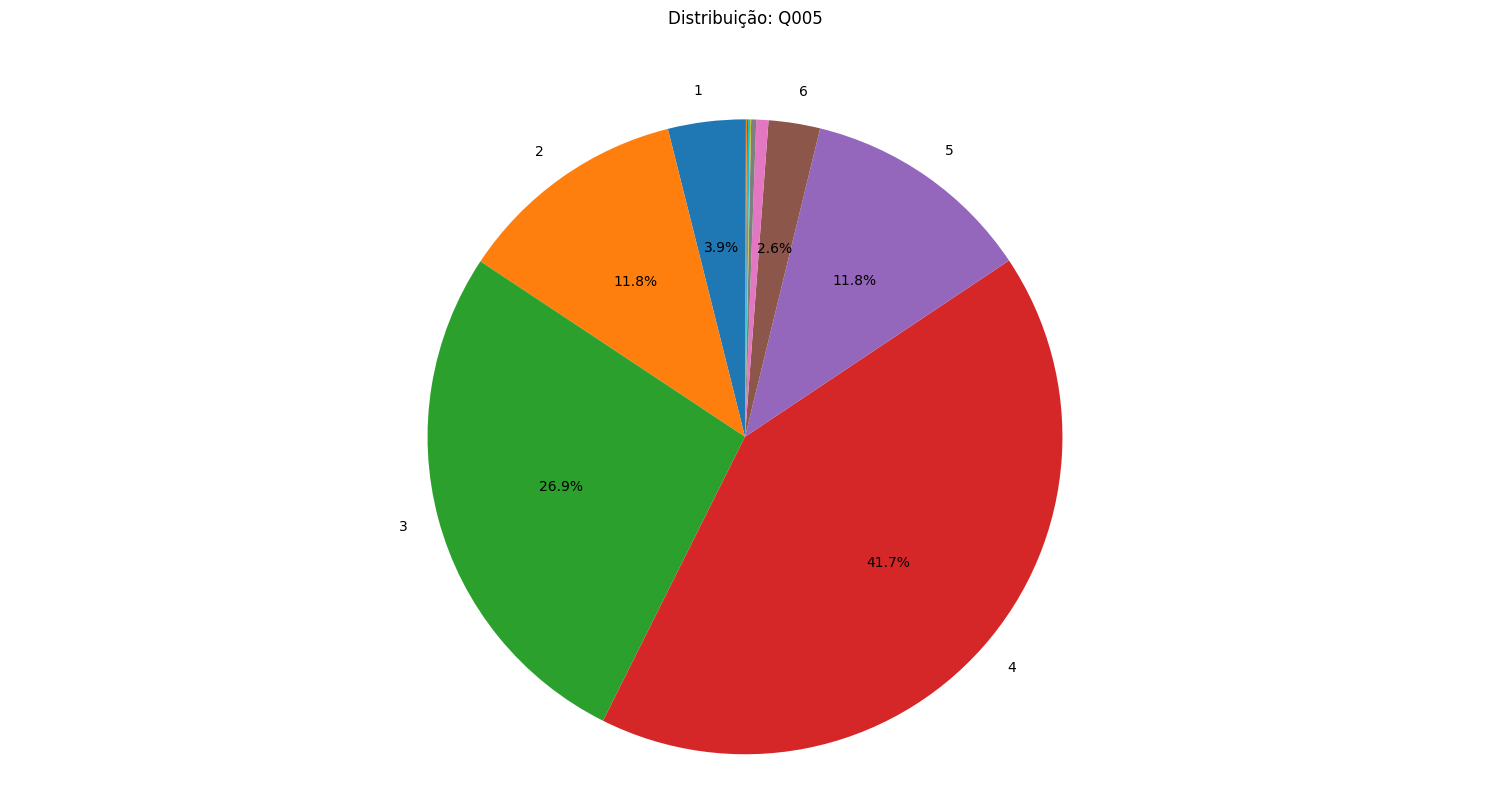

,categoria,descricao
0,1,"1, pois moro sozinho(a)."
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [84]:
getPizza(df_group, variable[5])

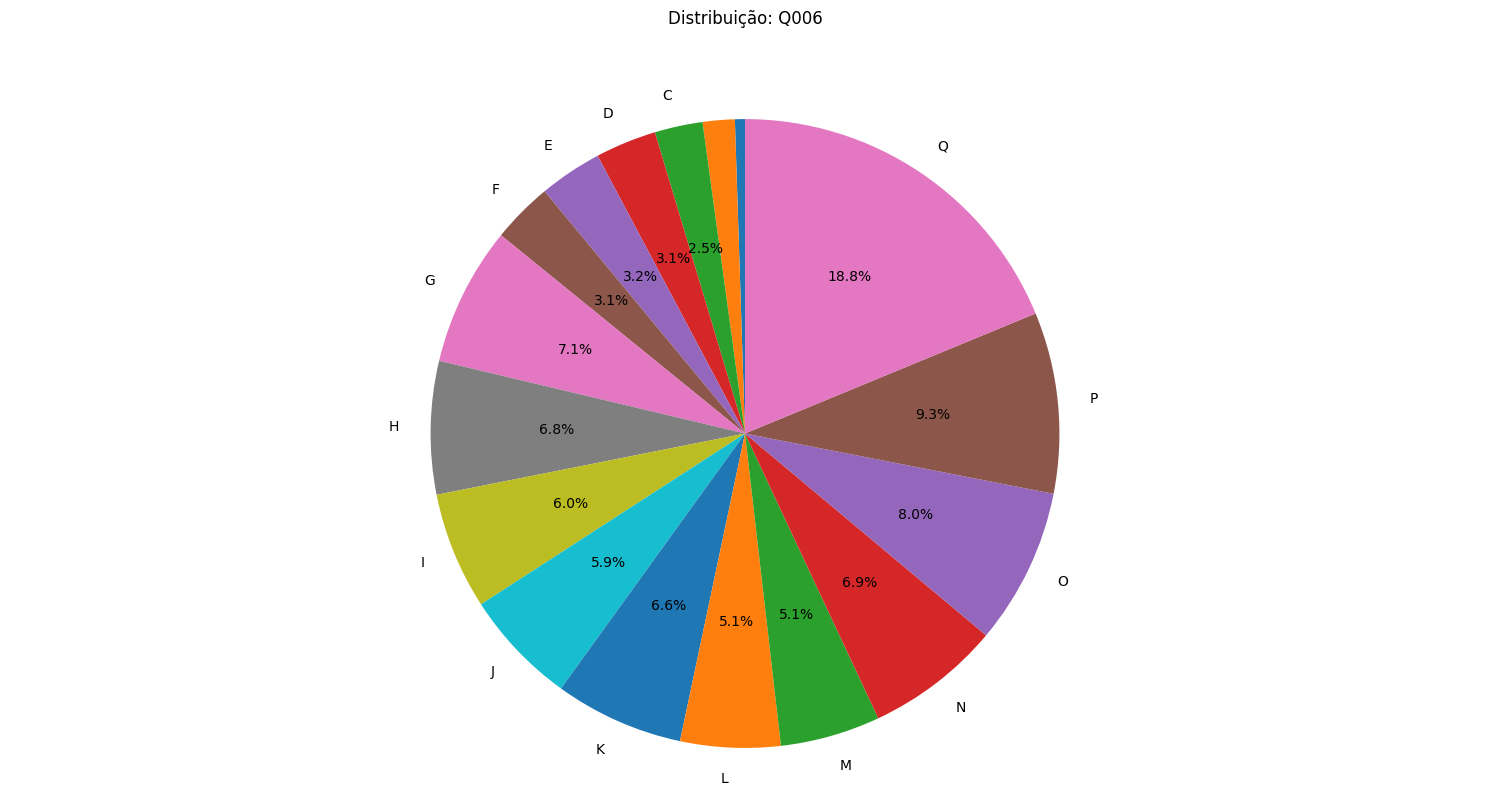

,categoria,descricao
0,A,Nenhuma Renda
1,B,"Até R$ 1.320,00"
2,C,"De R$ 1.320,01 até R$ 1.980,00."
3,D,"De R$ 1.980,01 até R$ 2.640,00."
4,E,"De R$ 2.640,01 até R$ 3.300,00."
5,F,"De R$ 3.300,01 até R$ 3.960,00."
6,G,"De R$ 3.960,01 até R$ 5.280,00."
7,H,"De R$ 5.280,01 até R$ 6.600,00."
8,I,"De R$ 6.600,01 até R$ 7.920,00."
9,J,"De R$ 7.920,01 até R$ 9240,00."


In [85]:
getPizza(df_group, variable[6])

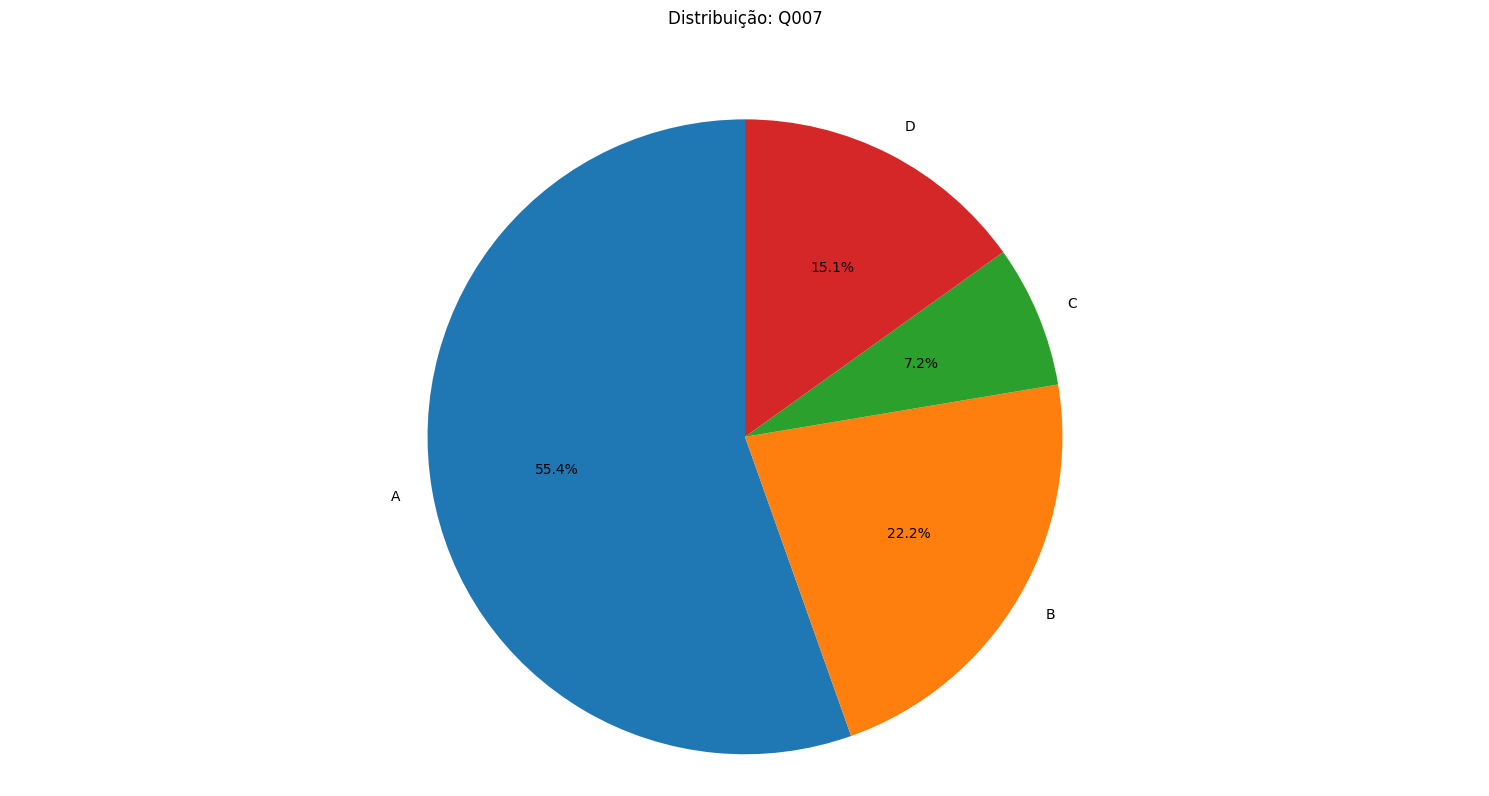

,categoria,descricao
0,A,Não.
1,B,"Sim, um ou dois dias por semana."
2,C,"Sim, três ou quatro dias por semana."
3,D,"Sim, pelo menos cinco dias por semana."


In [86]:
getPizza(df_group, variable[7])

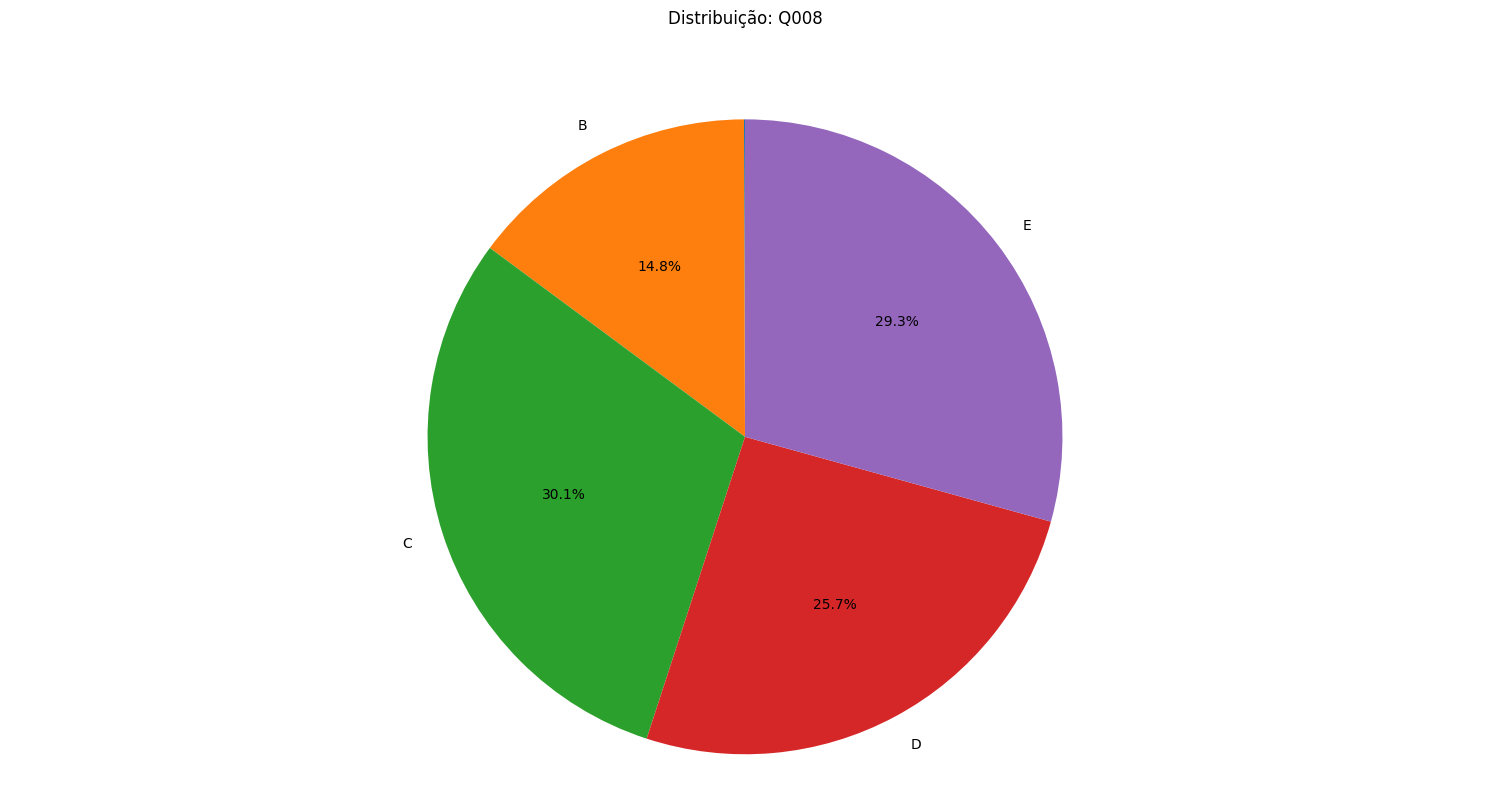

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [87]:
getPizza(df_group, variable[8])

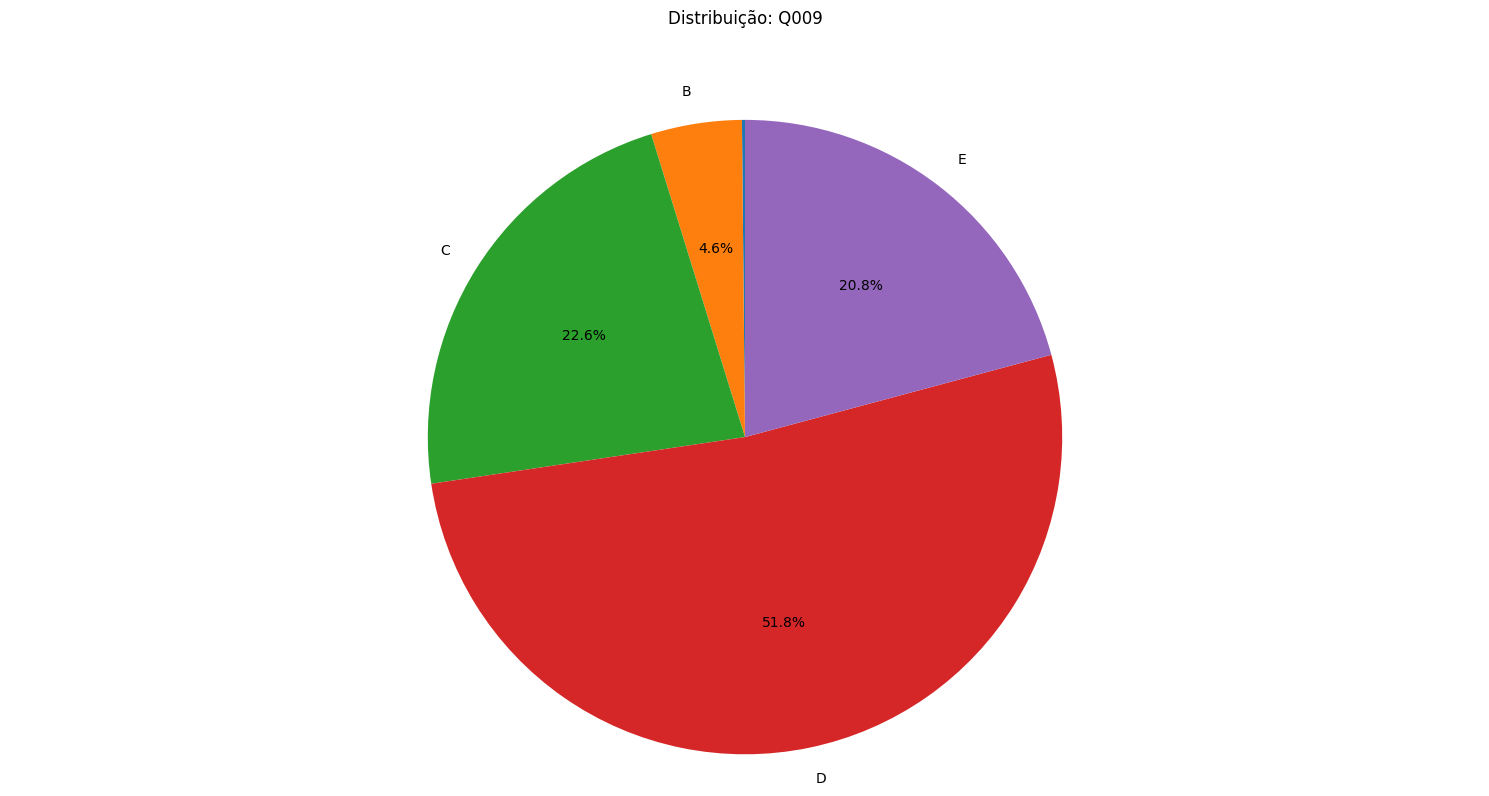

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [88]:
getPizza(df_group, variable[9])

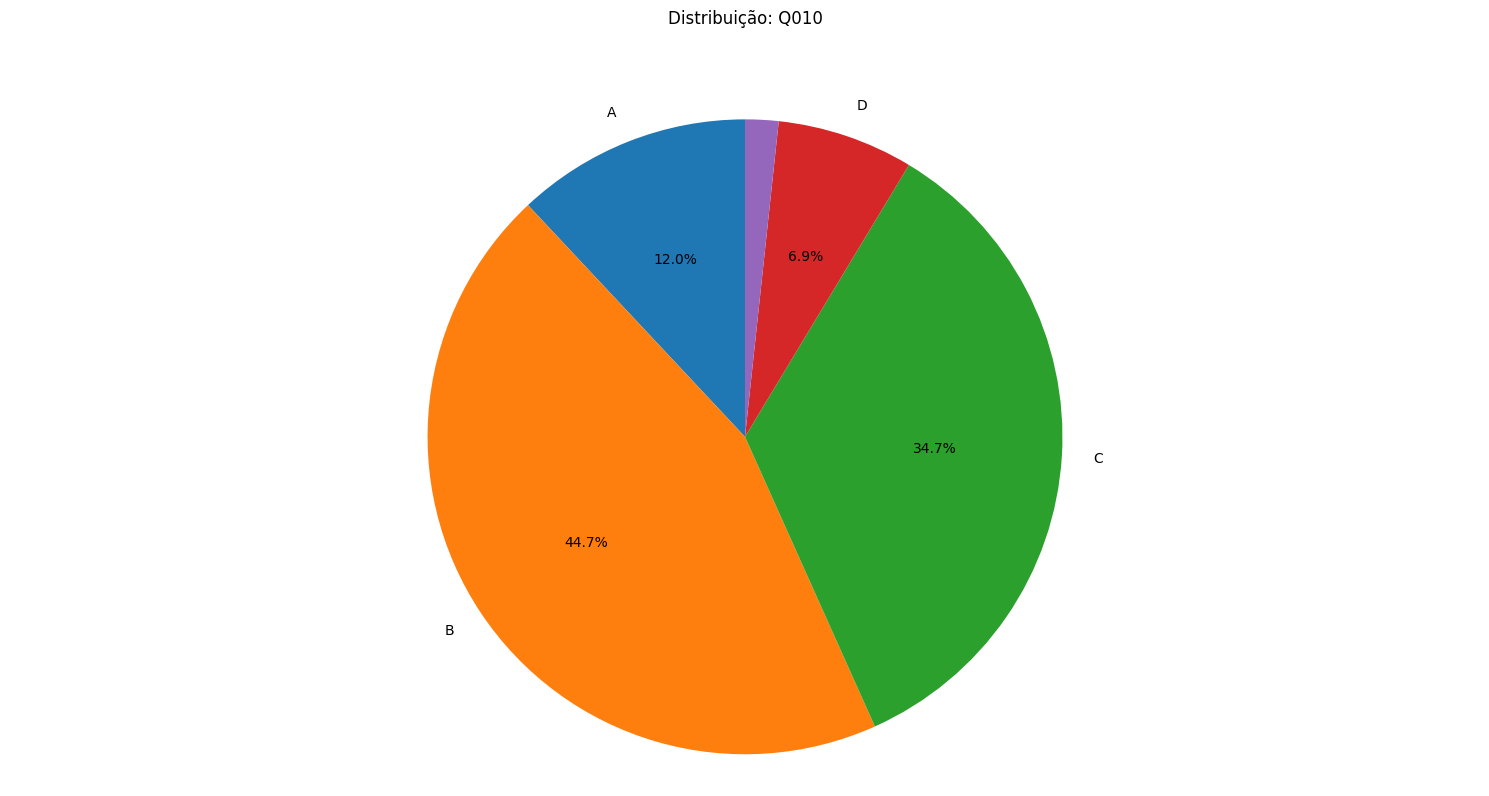

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [89]:
getPizza(df_group, variable[10])

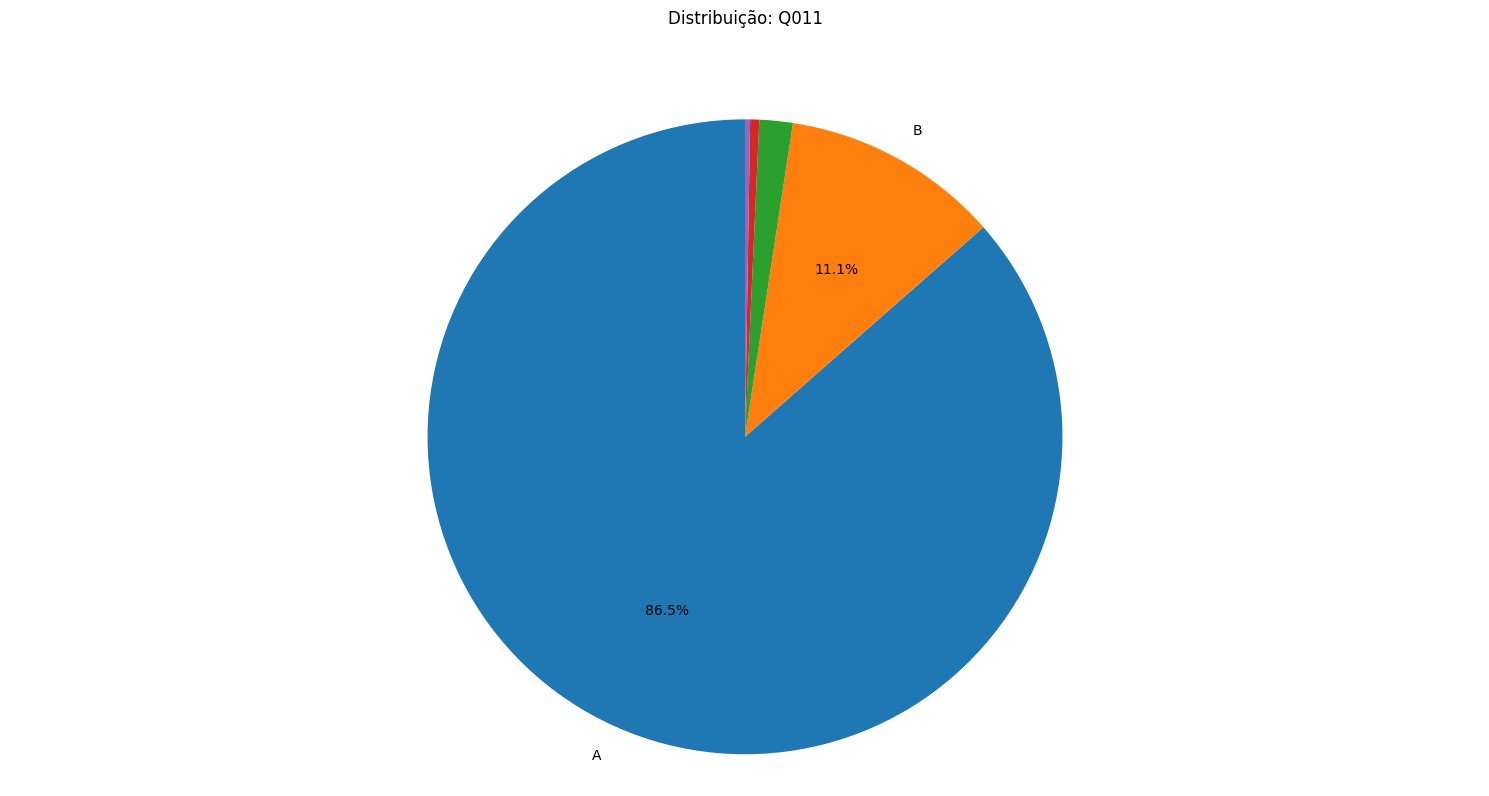

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [90]:
getPizza(df_group, variable[11])

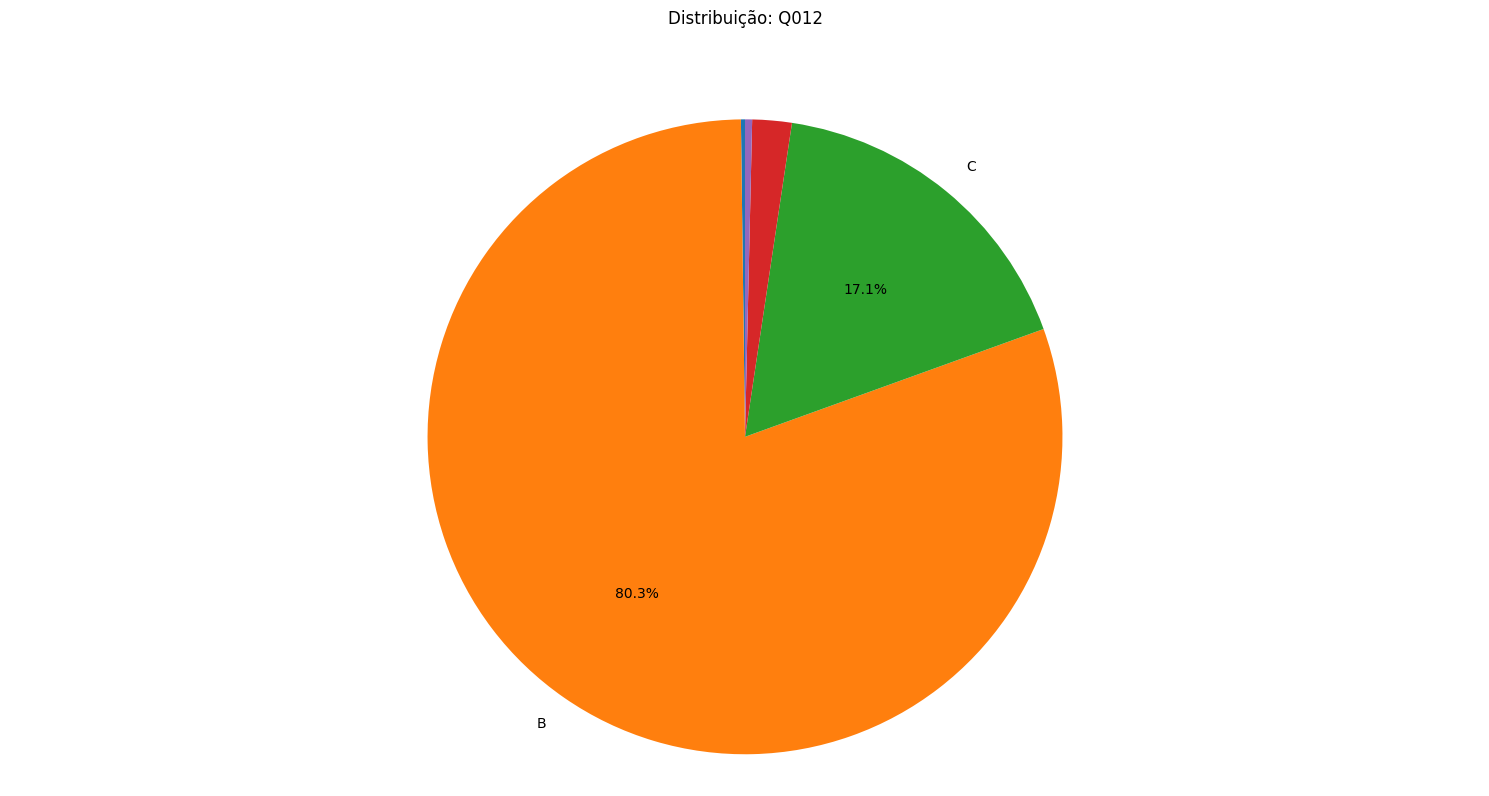

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [91]:
getPizza(df_group, variable[12])

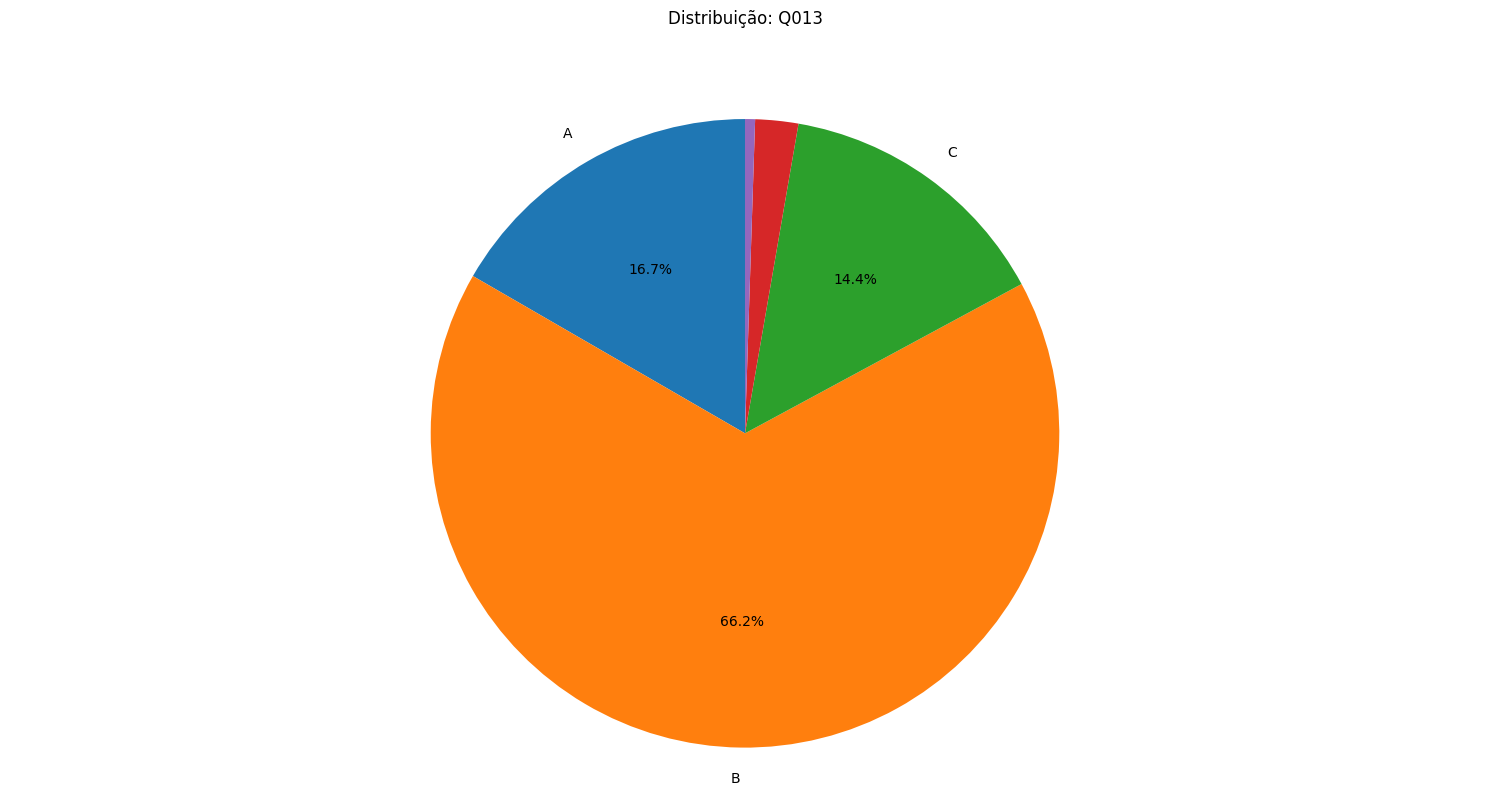

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [92]:
getPizza(df_group, variable[13])

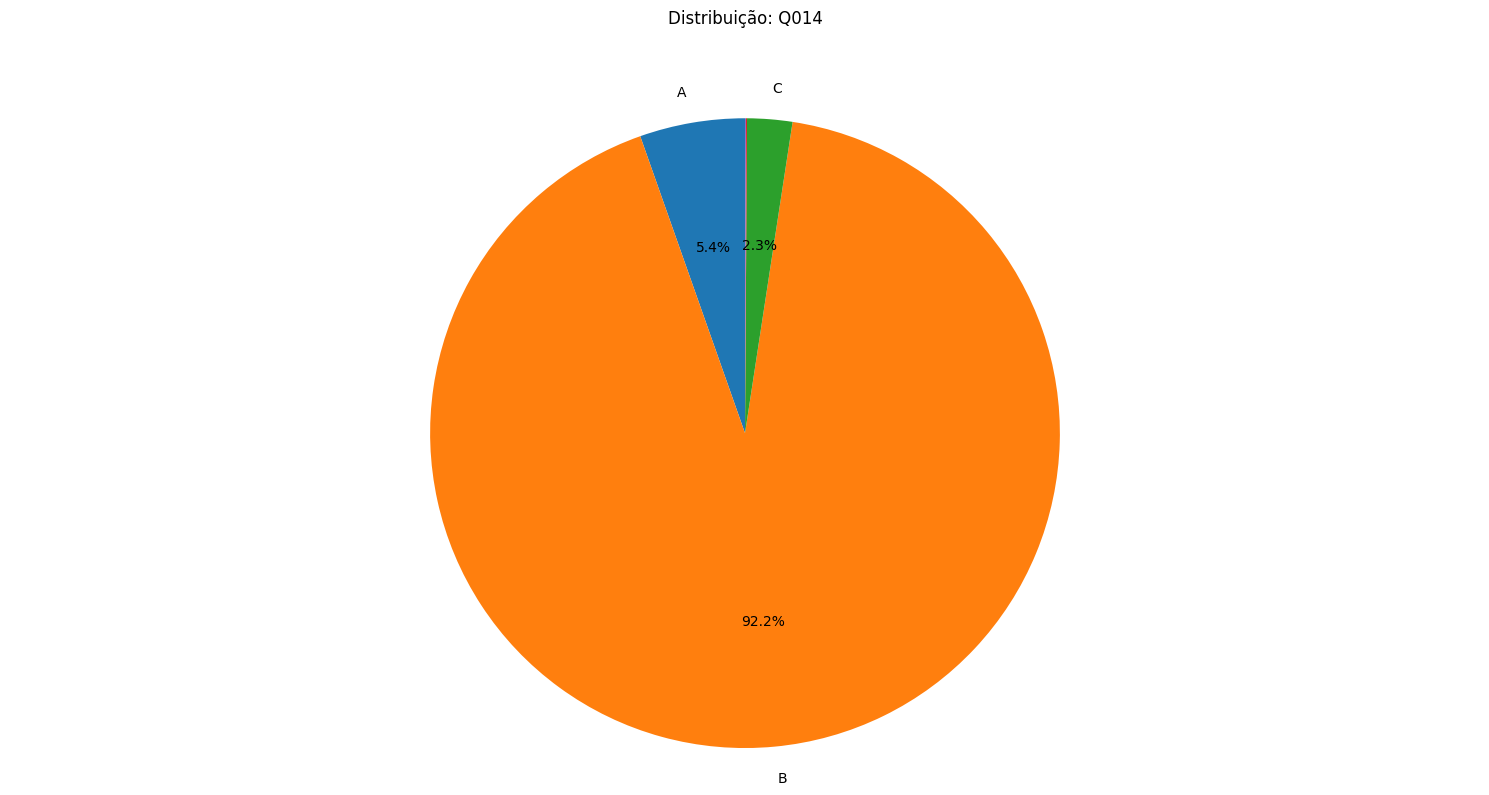

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [93]:
getPizza(df_group, variable[14])

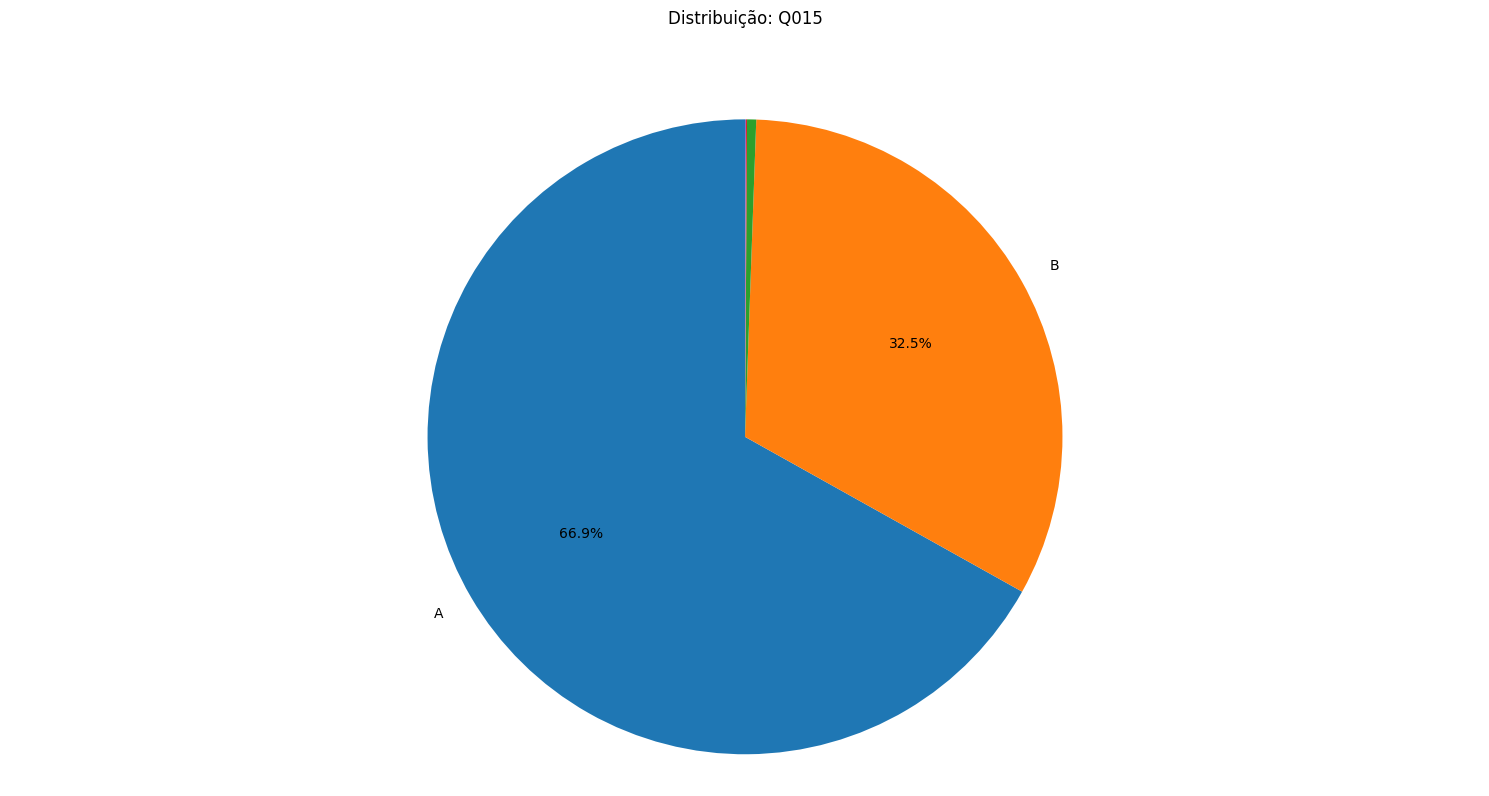

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [94]:
getPizza(df_group, variable[15])

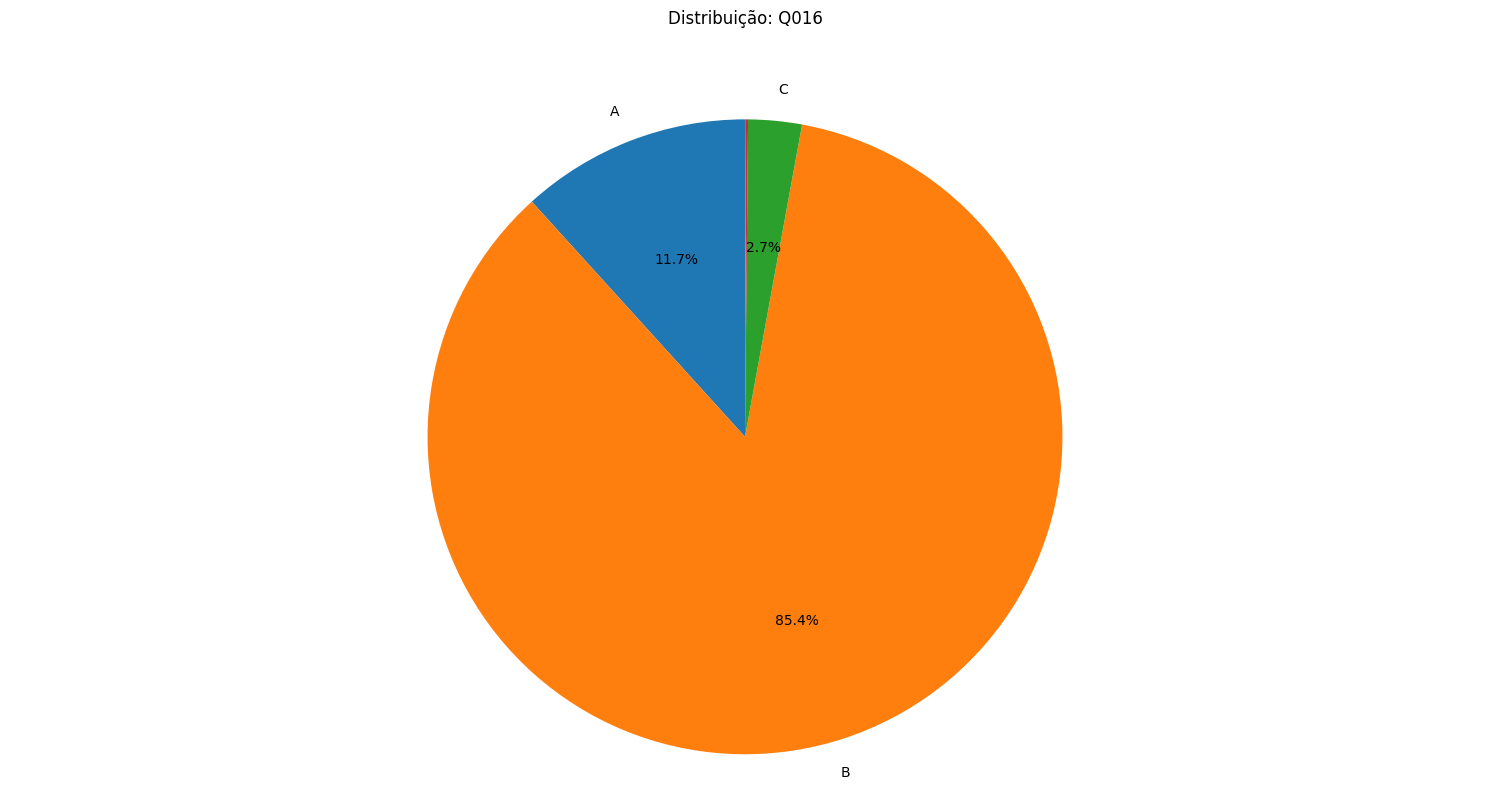

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [95]:
getPizza(df_group, variable[16])

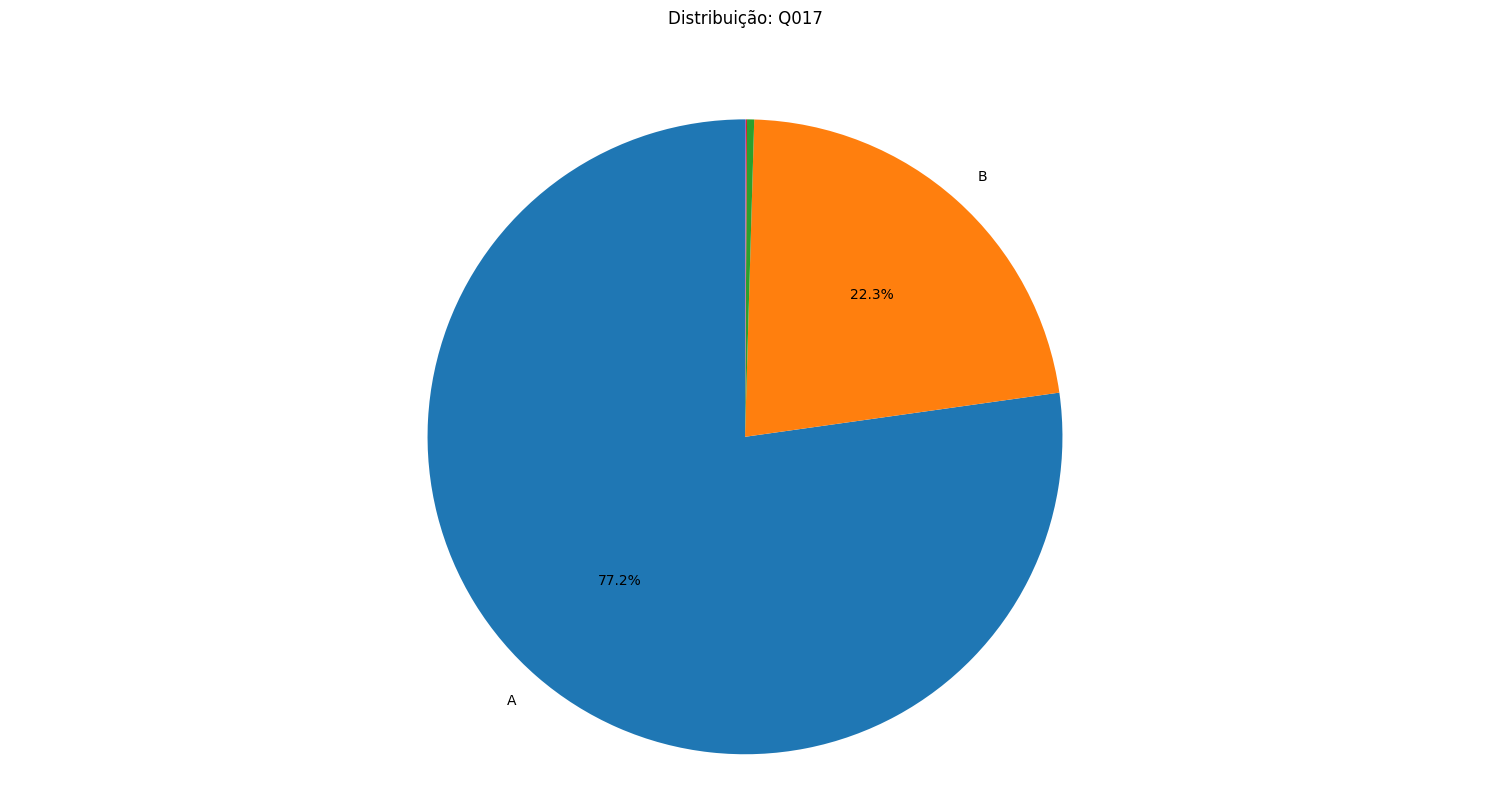

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [96]:
getPizza(df_group, variable[17])

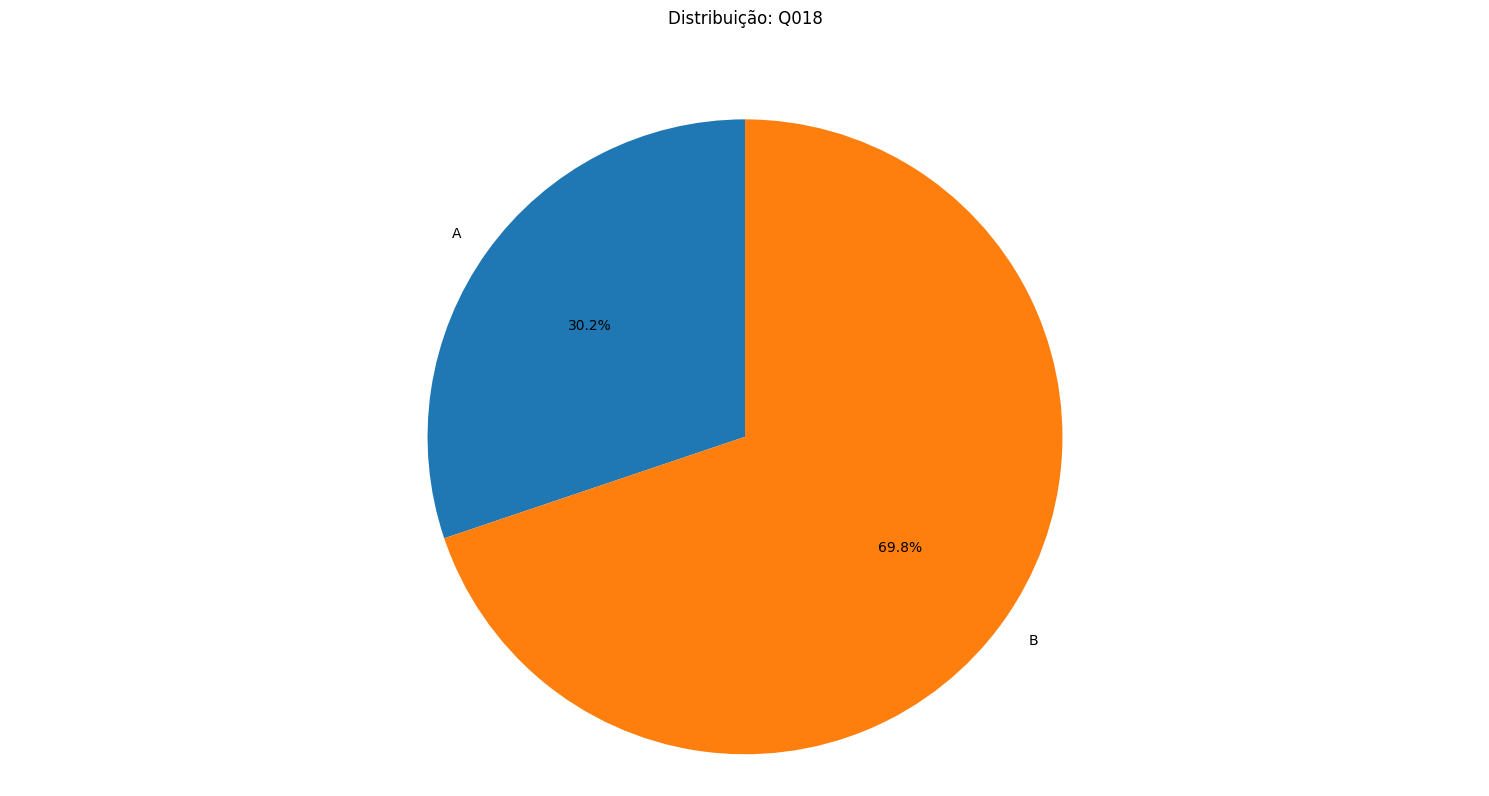

,categoria,descricao
0,A,Não.
1,B,Sim.


In [97]:
getPizza(df_group, variable[18])

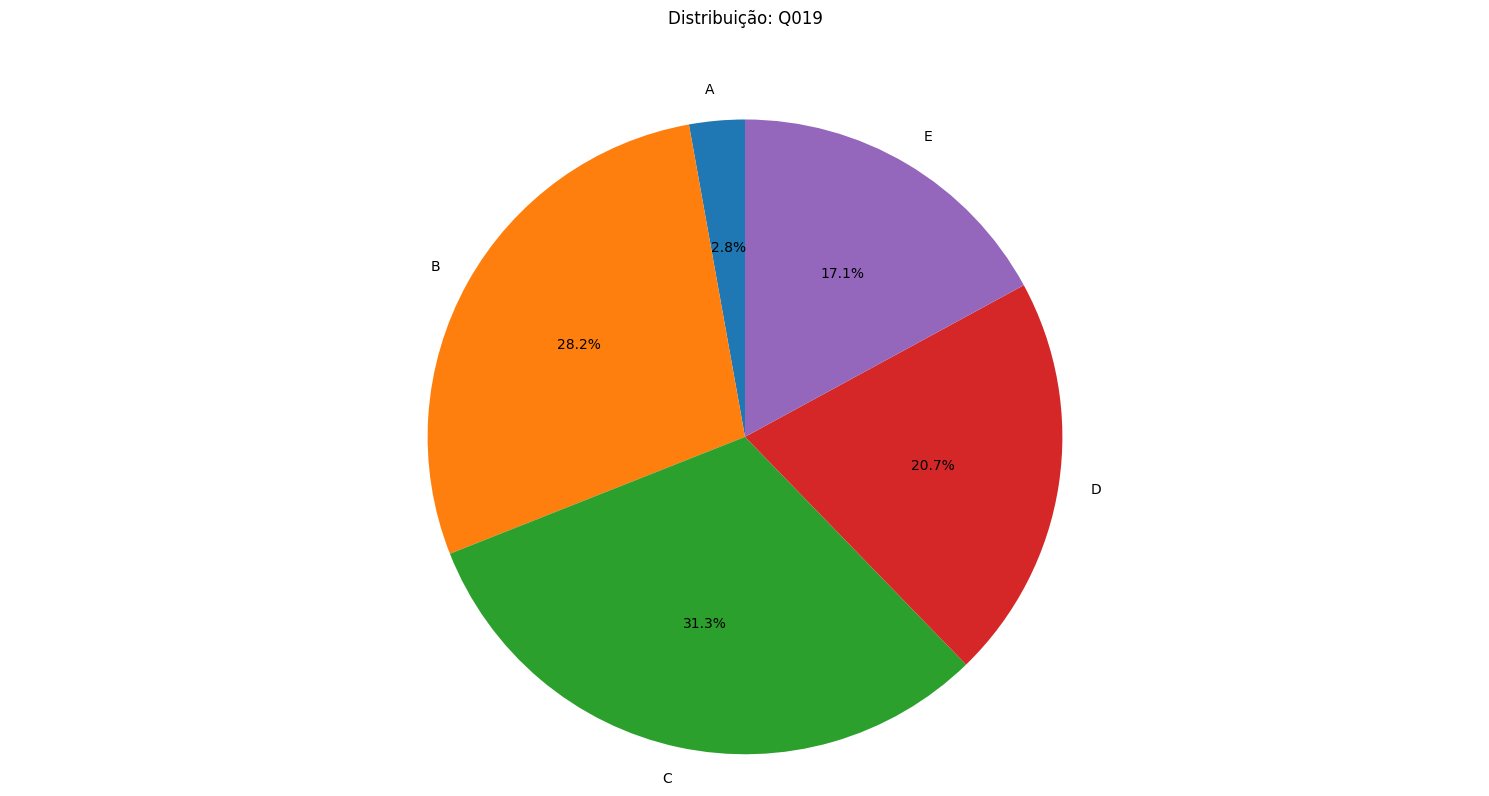

,categoria,descricao
0,A,Não.
1,B,"Sim, uma."
2,C,"Sim, duas."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [98]:
getPizza(df_group, variable[19])

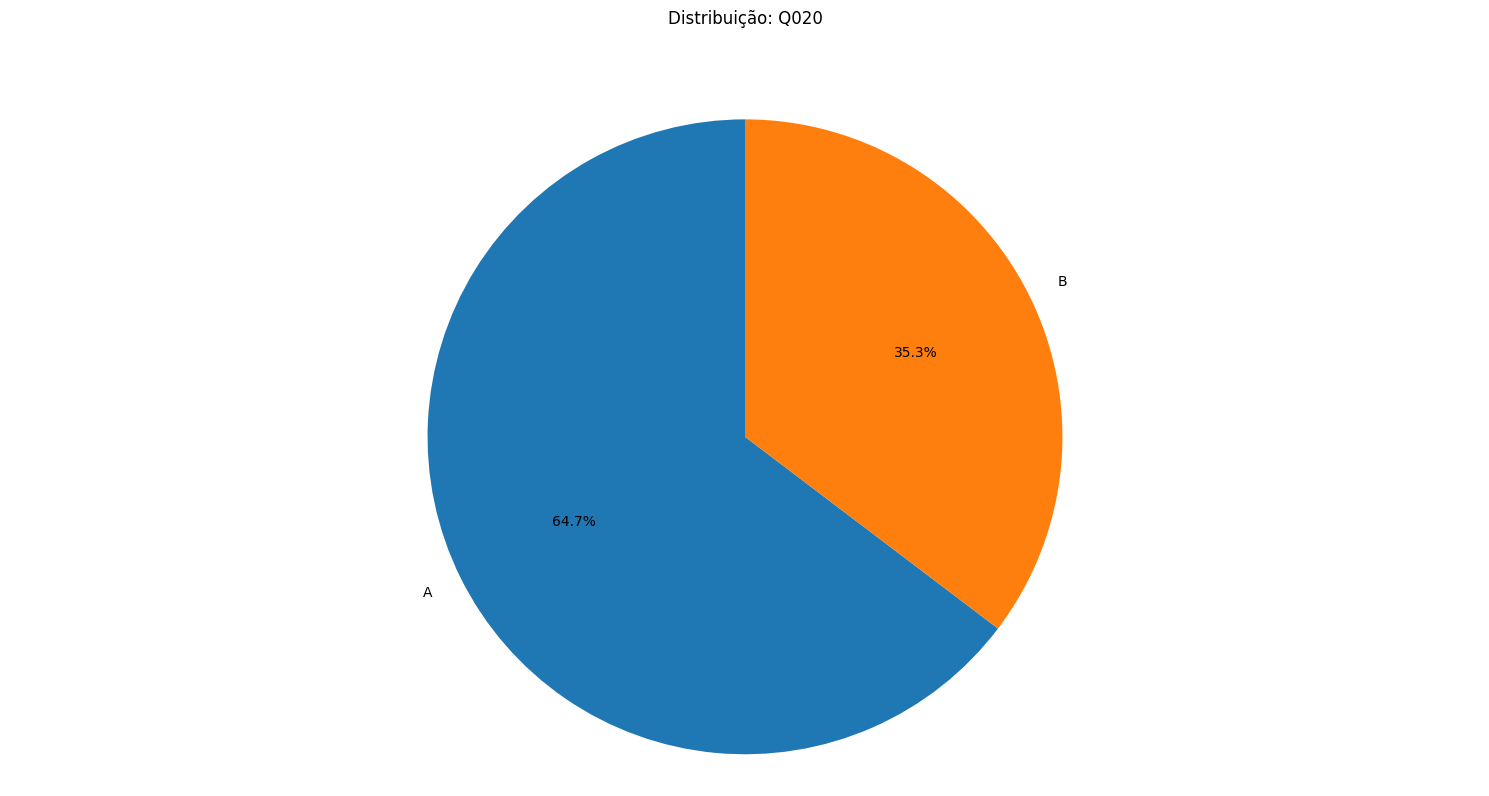

,categoria,descricao
0,A,Não.
1,B,Sim.


In [99]:
getPizza(df_group, variable[20])

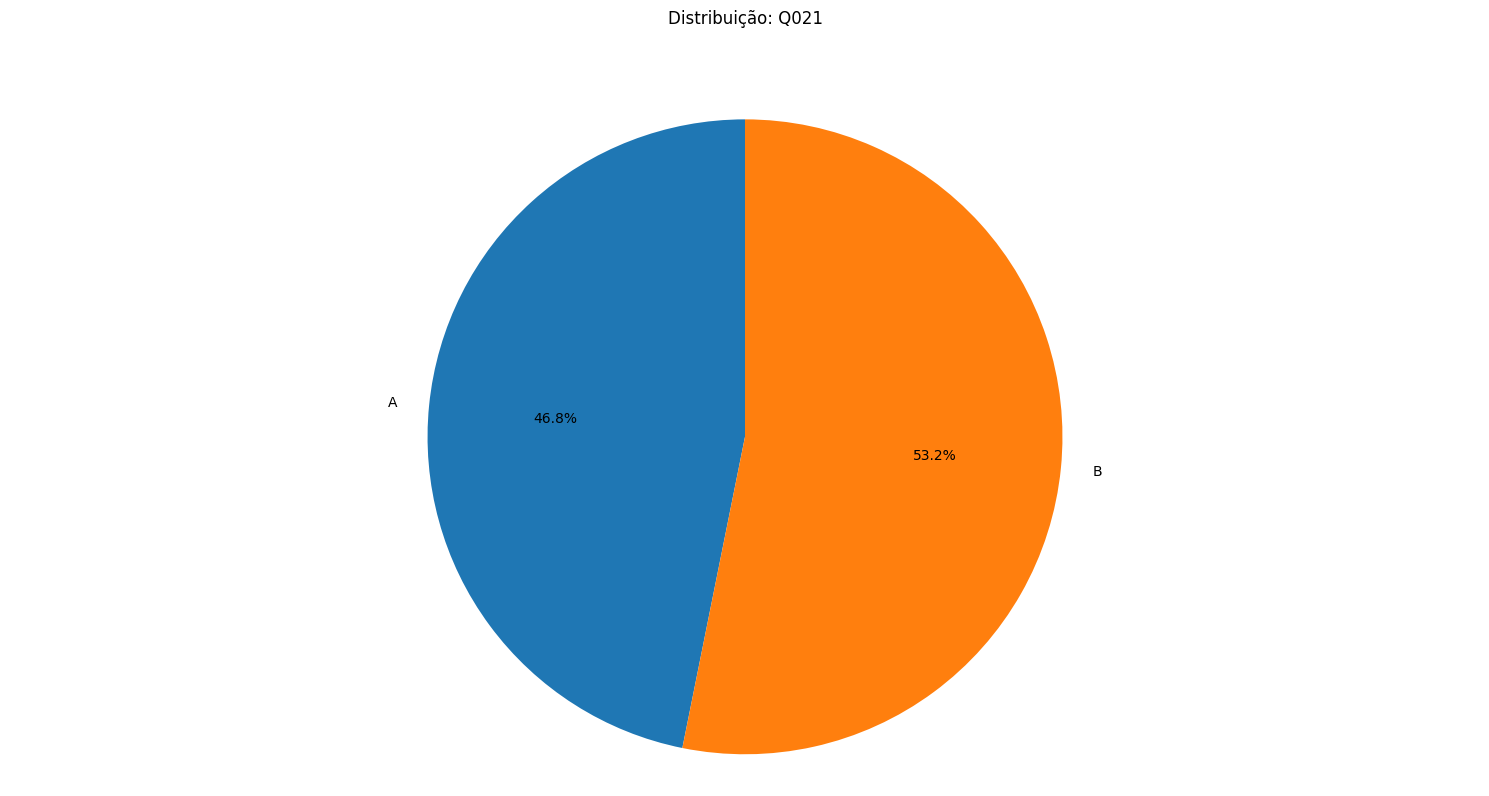

,categoria,descricao
0,A,Não.
1,B,Sim.


In [100]:
getPizza(df_group, variable[21])

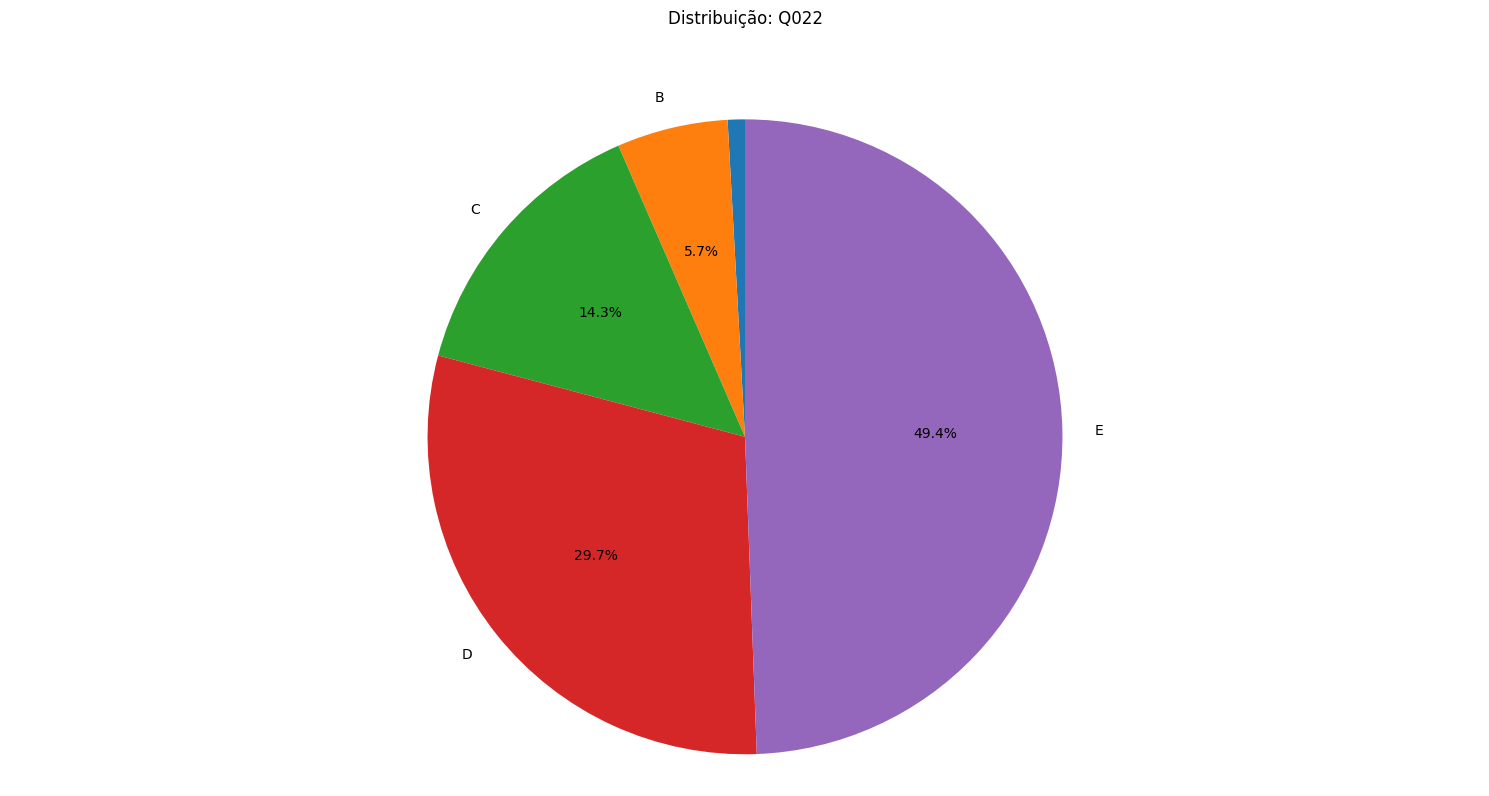

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [101]:
getPizza(df_group, variable[22])

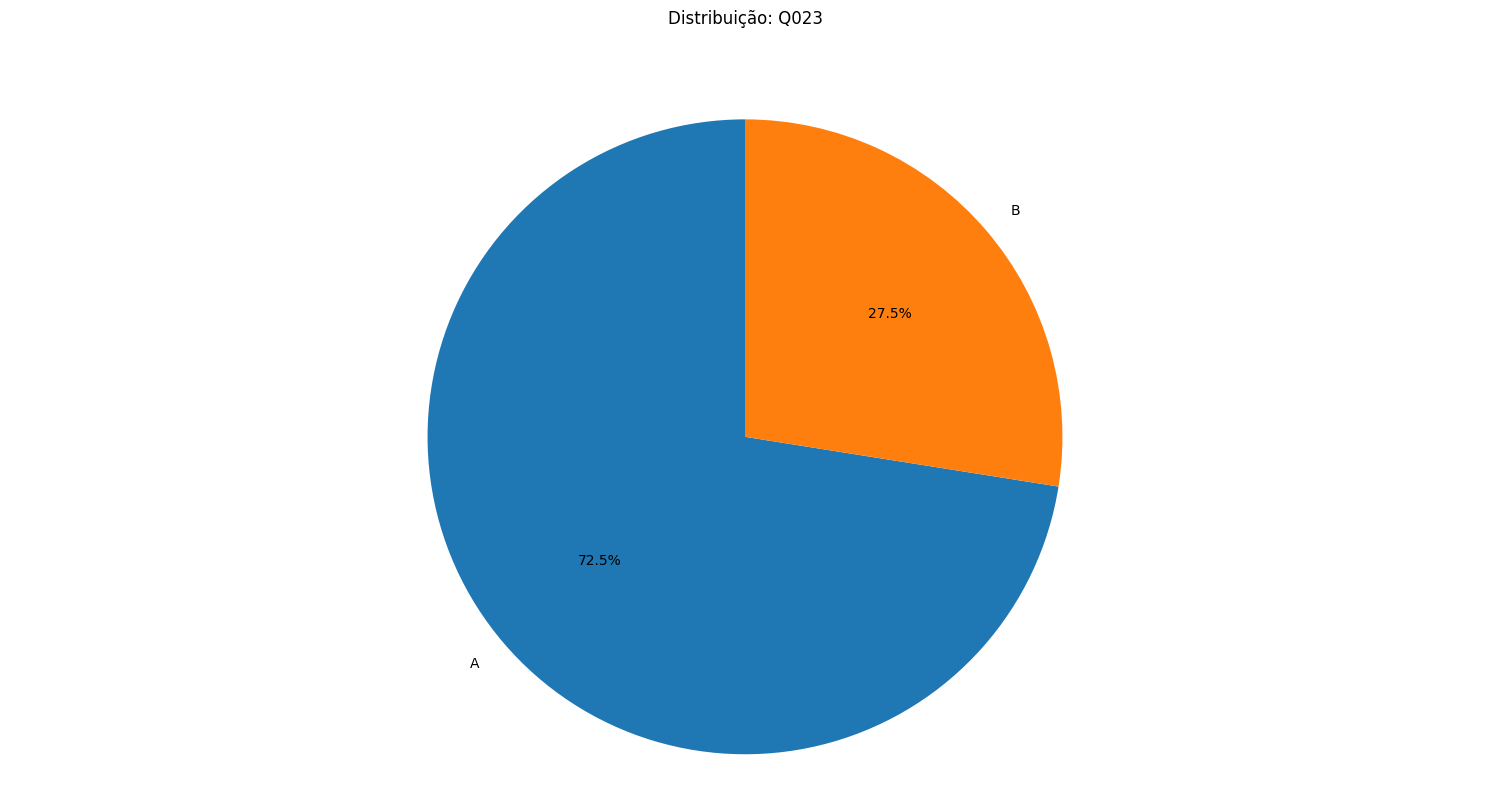

,categoria,descricao
0,A,Não.
1,B,Sim.


In [102]:
getPizza(df_group, variable[23])

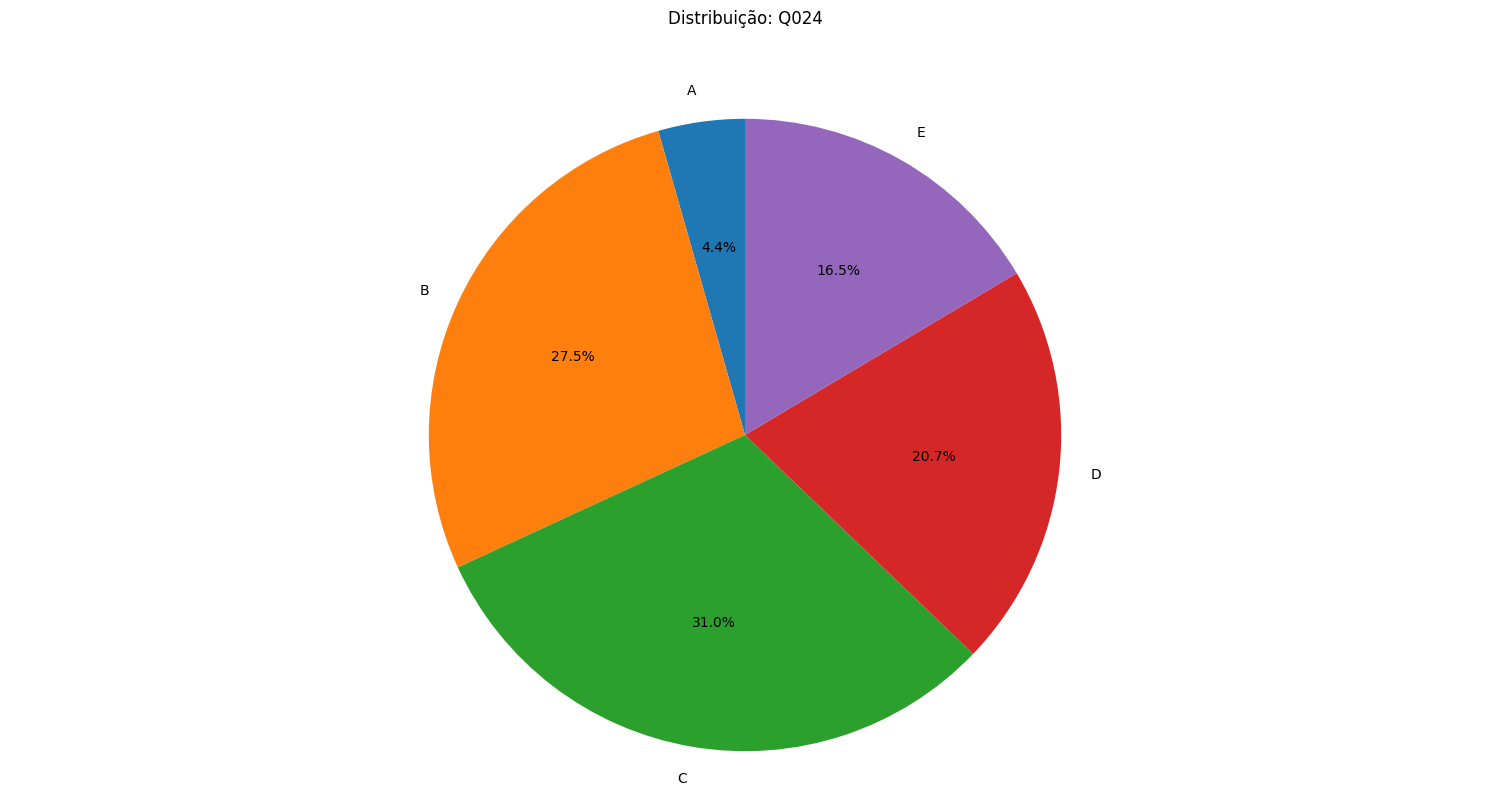

,categoria,descricao
0,A,Não.
1,B,"Sim, um."
2,C,"Sim, dois."
3,D,"Sim, três."
4,E,"Sim, quatro ou mais."


In [104]:
getPizza(df_group, variable[24])

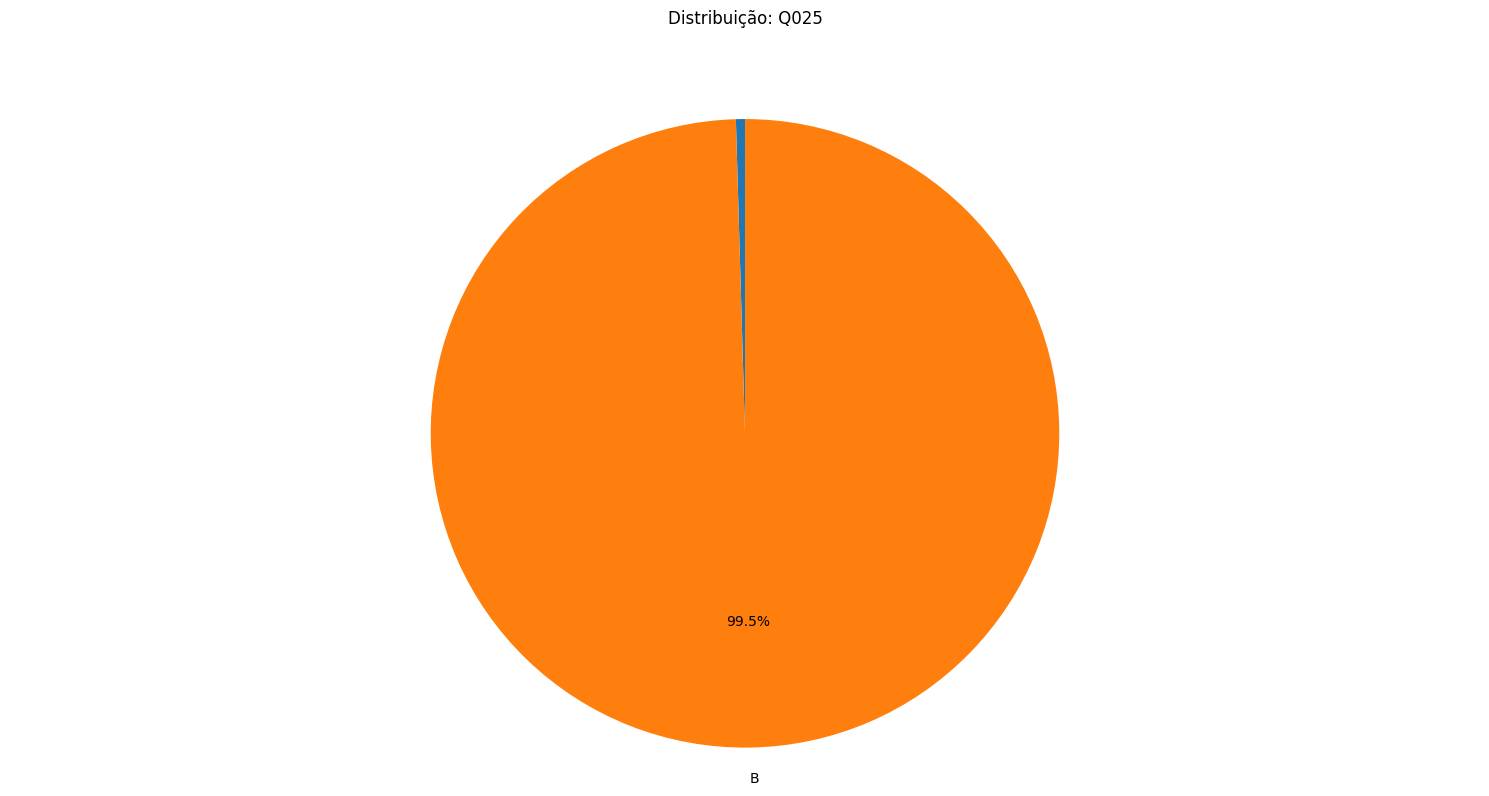

,categoria,descricao


In [105]:
getPizza(df_group, variable[25])

## Traçar Perfil do candidato

In [119]:
variables = variable[1:]  # Suponho que 'variable' seja uma lista de nomes de colunas
print(variables)
# Dicionário com o valor mais frequente de cada variável
mais_frequentes = {
    var: df_group.groupby(var)['NU_NOTA_MT'].count().idxmax()
    for var in variables
}

['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']
